In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
font_path = "/System/Library/Fonts/STHeiti Medium.ttc"
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid",{"font.sans-serif":['Arial Unicode MS', 'Arial']})

In [2]:
df = pd.read_csv("../../data/tbrain_cc_training_48tags_hash_final.csv")
len(df)

32975653

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32975653 entries, 0 to 32975652
Data columns (total 53 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   dt                        int64  
 1   chid                      int64  
 2   shop_tag                  object 
 3   txn_cnt                   int64  
 4   txn_amt                   float64
 5   domestic_offline_cnt      int64  
 6   domestic_online_cnt       int64  
 7   overseas_offline_cnt      int64  
 8   overseas_online_cnt       int64  
 9   domestic_offline_amt_pct  float64
 10  domestic_online_amt_pct   float64
 11  overseas_offline_amt_pct  float64
 12  overseas_online_amt_pct   float64
 13  card_1_txn_cnt            int64  
 14  card_2_txn_cnt            int64  
 15  card_3_txn_cnt            int64  
 16  card_4_txn_cnt            int64  
 17  card_5_txn_cnt            int64  
 18  card_6_txn_cnt            int64  
 19  card_7_txn_cnt            int64  
 20  card_8_txn_cnt        

# EDA

消費人數及數量

In [6]:
print(f"user count: {len(df['chid'].unique())}, shop_tag count: {len(df['shop_tag'].unique())}")

user count: 500000, shop_tag count: 49


查看日期數量

Text(0.5, 1.0, '日期資料筆數統計')

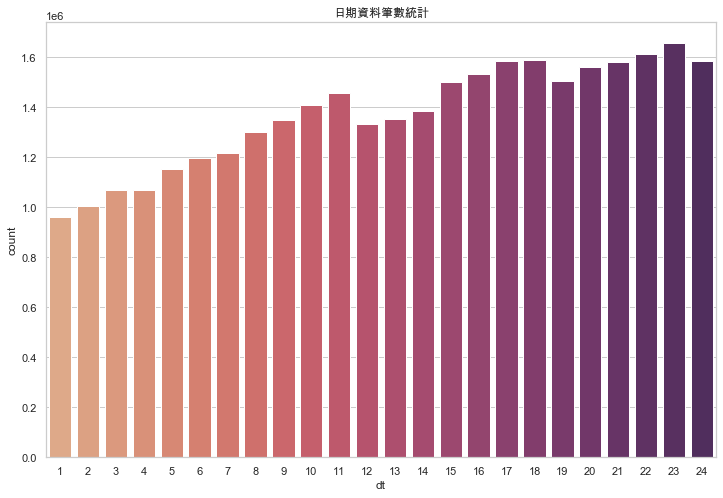

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x='dt', data=df, palette="flare")
plt.title("日期資料筆數統計")

目前先使用總共消費次數進行分析，如效果不彰，在單一看說是否需改為海外及國內線上實體等通路因素。

In [23]:
df.head()[["txn_cnt", "domestic_offline_cnt", "domestic_online_cnt", "overseas_offline_cnt", "overseas_online_cnt"]]

,txn_cnt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt
0,3,3,0,0,0
1,2,2,0,0,0
2,2,0,2,0,0
3,9,7,2,0,0
4,1,1,0,0,0


目前先使用總共消費次數進行分析，如效果不彰，在看是否要做特徵摋選挑出適合的卡片資訊。

In [28]:
df.head()[[f"card_{i}_txn_cnt" for i in range(1,15)]]

,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt
0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,9,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, '類別消費次數統計 ')

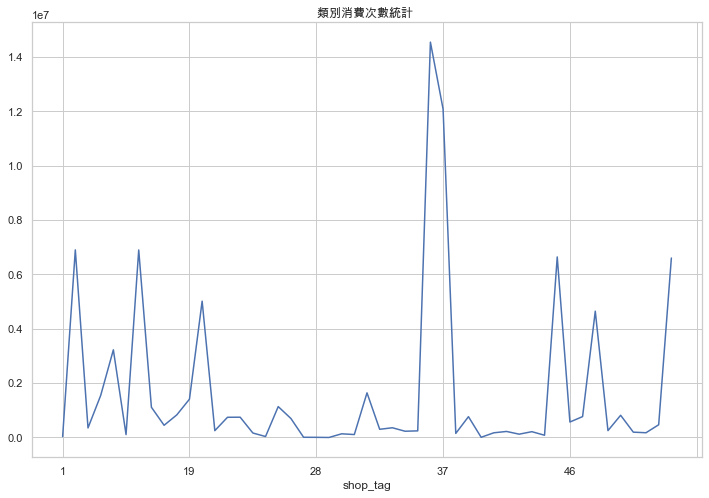

In [61]:
plt.figure(figsize=(12,8))
df.groupby(["shop_tag"])["txn_cnt"].sum().plot(kind="line")
plt.title("類別消費次數統計 ")

Text(0.5, 1.0, '顧客消費次數kde圖')

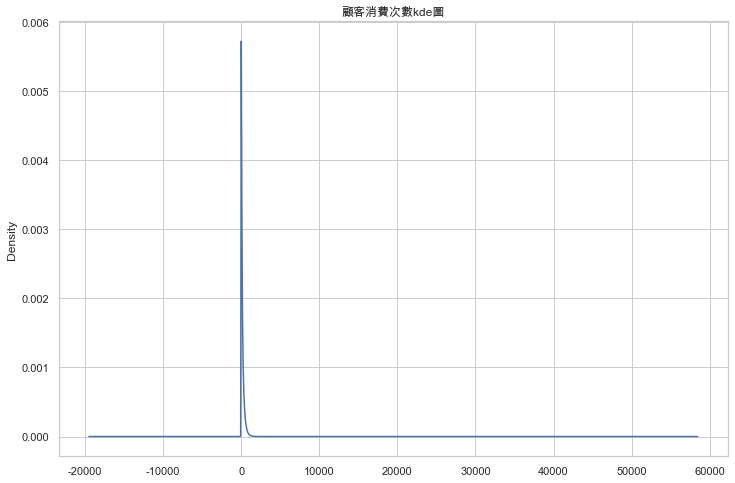

In [59]:
plt.figure(figsize=(12,8))
df.groupby(["chid"])["txn_cnt"].sum().plot(kind="kde")
plt.title("顧客消費次數kde圖")

消費金額資訊

Text(0.5, 1.0, '消費金額分佈資訊')

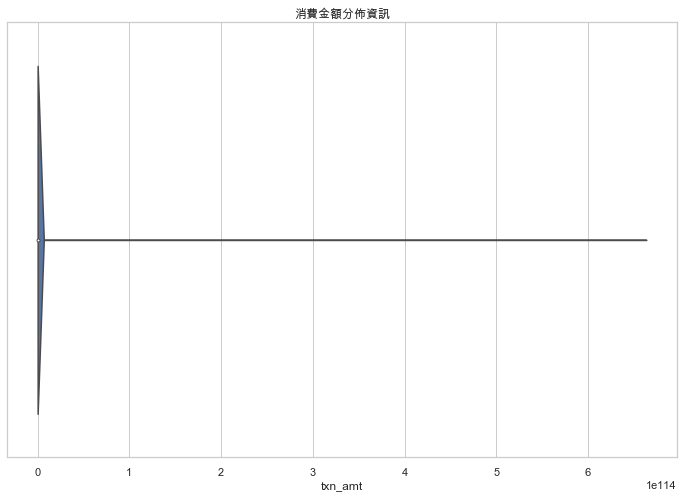

In [21]:
plt.figure(figsize=(12,8))
sns.violinplot(x=df["txn_amt"])
plt.title("消費金額分佈資訊")

顧客婚姻狀態

In [30]:
unique_id_df = df.drop_duplicates(subset=["chid"])

In [33]:
unique_id_df["masts"].value_counts()

1.0    252842
2.0    246942
3.0       212
Name: masts, dtype: int64

<AxesSubplot:ylabel='masts'>

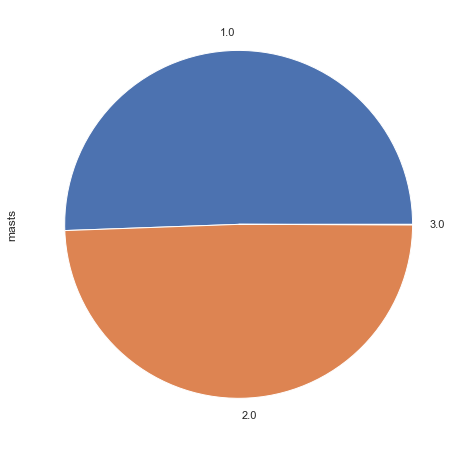

In [31]:
unique_id_df["masts"].value_counts().plot(kind='pie', figsize=(12,8))

學歷代碼

In [35]:
unique_id_df["educd"].value_counts()

3.0    192055
5.0     97600
4.0     87637
6.0     64780
2.0     53107
1.0      4817
Name: educd, dtype: int64

Text(0.5, 1.0, '顧客學歷分布情形')

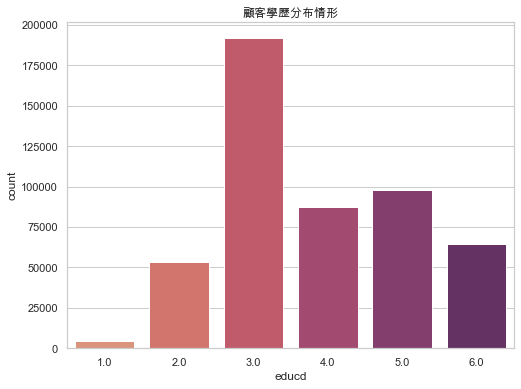

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='educd', data=unique_id_df, palette="flare")
plt.title("顧客學歷分布情形")

顧客行業別

In [62]:
unique_id_df["trdtp"].value_counts()

15.0    168339
11.0     62311
5.0      61207
2.0      54719
12.0     31559
8.0      19677
13.0     17922
10.0     16755
17.0     15897
6.0      12876
14.0     11105
7.0       9360
4.0       7833
9.0       3216
3.0       1873
19.0      1467
16.0      1094
20.0       698
18.0       498
1.0        326
21.0       309
27.0       229
28.0       217
22.0       181
23.0       112
26.0        99
25.0        53
24.0        50
29.0        14
Name: trdtp, dtype: int64

Text(0.5, 1.0, '顧客行業分布情形')

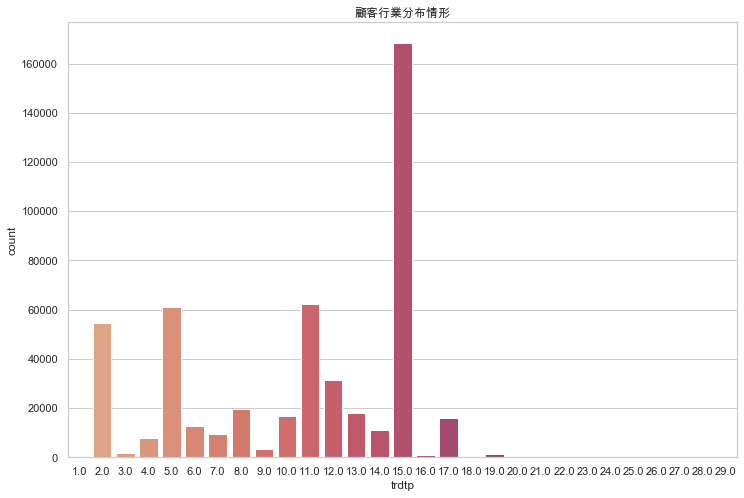

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x='trdtp', data=unique_id_df, palette="flare")
plt.title("顧客行業分布情形")

顧客國籍

Text(0.5, 1.0, '顧客國籍分布情形')

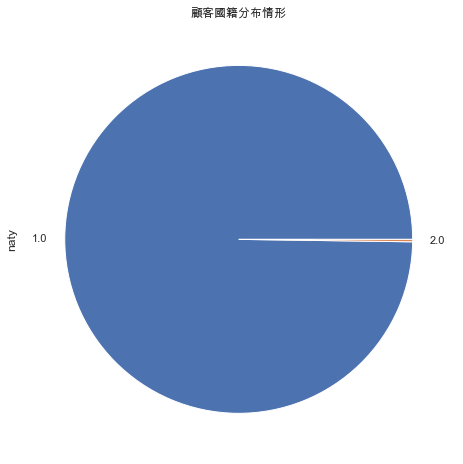

In [64]:
unique_id_df["naty"].value_counts().plot(kind='pie', figsize=(12,8))
plt.title("顧客國籍分布情形")

顧客職位別

In [67]:
unique_id_df["poscd"].value_counts()

99.0    189899
2.0     154689
3.0      46066
1.0      45413
8.0      18883
6.0      16703
4.0      14347
5.0      11399
7.0       2513
10.0        83
9.0          1
Name: poscd, dtype: int64

Text(0.5, 1.0, '顧客職位分布情形')

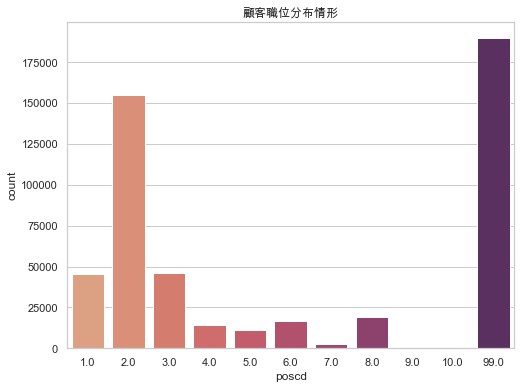

In [69]:
plt.figure(figsize=(8,6))
sns.countplot(x='poscd', data=unique_id_df, palette="flare")
plt.title("顧客職位分布情形")

客戶來源

In [70]:
unique_id_df["cuorg"].value_counts()

30.0    487565
14.0      2498
6.0       1938
18.0      1253
4.0       1174
32.0       832
15.0       766
24.0       560
2.0        412
17.0       406
19.0       342
26.0       340
12.0       314
13.0       308
21.0       290
3.0        279
8.0        229
7.0        127
35.0        67
11.0        65
25.0        58
29.0        44
31.0        43
20.0        22
27.0        21
22.0        14
16.0        13
28.0         9
23.0         3
1.0          1
9.0          1
5.0          1
38.0         1
Name: cuorg, dtype: int64

Text(0.5, 1.0, '顧客來源分布情形')

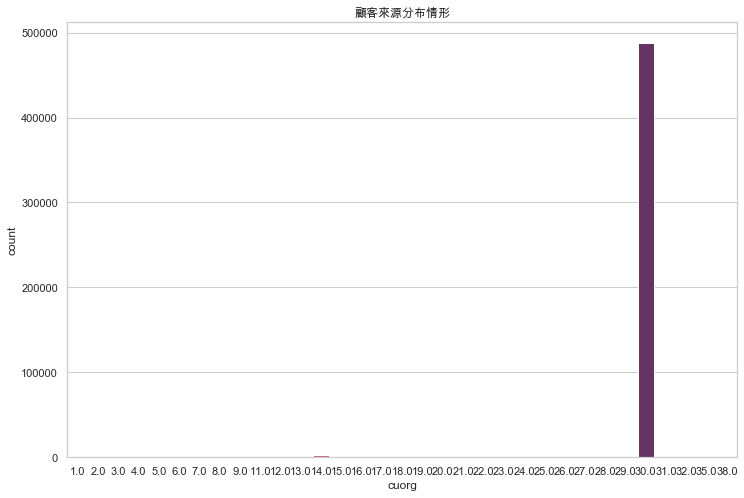

In [71]:
plt.figure(figsize=(12,8))
sns.countplot(x='cuorg', data=unique_id_df, palette="flare")
plt.title("顧客來源分布情形")

顧客正卡信用額度

In [72]:
unique_id_df["slam"].value_counts()

68561.2                    32228
59701.5                    30569
87397.1                    26761
102382.6                   21555
74152.1                    21075
                           ...  
91577635701576880.0            1
236640636479688015872.0        1
30255.7                        1
8174346640297.5                1
1007408543255010816.0          1
Name: slam, Length: 1180, dtype: int64

Text(0.5, 1.0, '顧客正卡信用額度kde分佈情形')

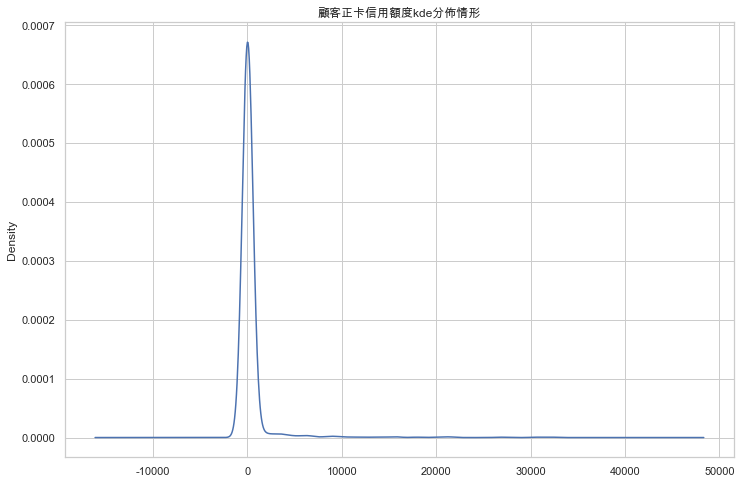

In [77]:
unique_id_df["slam"].value_counts().plot(kind='kde', figsize=(12,8))
plt.title("顧客正卡信用額度kde分佈情形")

顧客性別

Text(0.5, 1.0, '顧客性別統計')

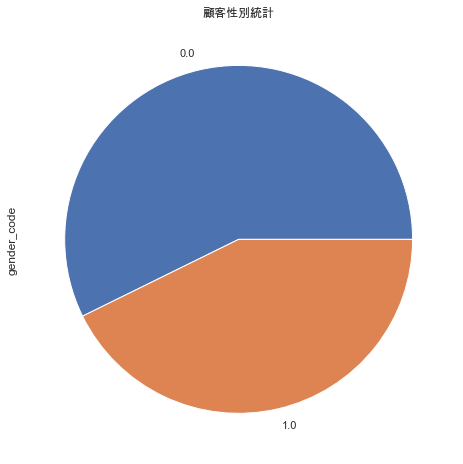

In [78]:
unique_id_df["gender_code"].value_counts().plot(kind='pie', figsize=(12,8))
plt.title("顧客性別統計")

顧客年紀

In [79]:
unique_id_df["age"].value_counts()

3.0    139283
4.0    130736
5.0     92520
2.0     74715
6.0     45355
7.0      9089
1.0      2369
8.0       892
9.0        29
Name: age, dtype: int64

Text(0.5, 1.0, '顧客年紀分布情形')

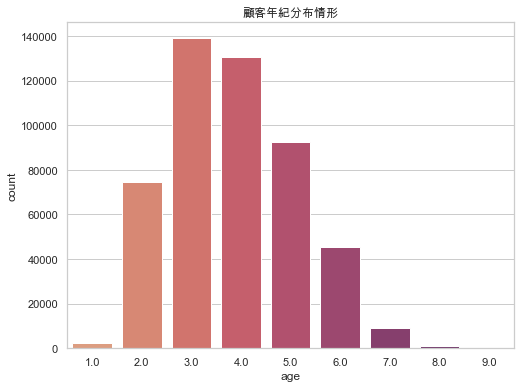

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(x='age', data=unique_id_df, palette="flare")
plt.title("顧客年紀分布情形")

顧客是否有正負卡註記

Text(0.5, 1.0, '顧客是否有正副卡')

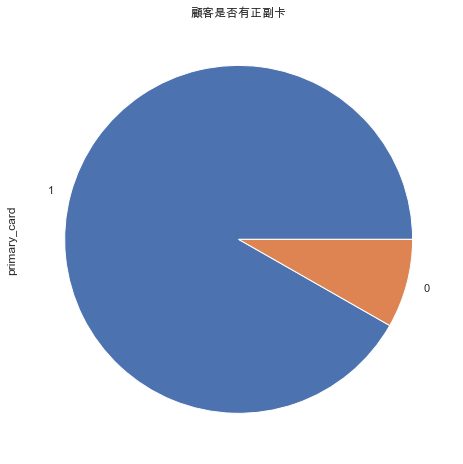

In [84]:
unique_id_df["primary_card"].value_counts().plot(kind='pie', figsize=(12,8))
plt.title("顧客是否有正副卡")

In [3]:
df = df[["dt", "chid", "shop_tag", "txn_cnt", "txn_amt", "masts", "educd", "trdtp", "naty", "poscd", "cuorg", "gender_code", "age", "primary_card"]]
df.dropna(inplace=True)

In [4]:
df["chid"].value_counts()

10309364    441
10275581    413
10315702    413
10360428    405
10101102    400
           ... 
10186166      1
10102330      1
10435705      1
10275809      1
10349861      1
Name: chid, Length: 494985, dtype: int64

In [5]:
len(df["chid"].unique())

494985

In [4]:
import numpy as np
small = df[["dt", "chid", "shop_tag", "txn_cnt", "txn_amt", "masts", "educd", "trdtp", "naty", "poscd", "cuorg", "gender_code", "age", "primary_card"]]
len(small)

30861960

In [5]:
small["txn_amt"] = small["txn_amt"].apply(np.log)
small.head()

/var/folders/kt/x30tbjwn7g96gghmgl32dv3h0000gn/T/ipykernel_25301/1281427040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small["txn_amt"] = small["txn_amt"].apply(np.log)


,dt,chid,shop_tag,txn_cnt,txn_amt,masts,educd,trdtp,naty,poscd,cuorg,gender_code,age,primary_card
0,1,10321418,45,3,8.266670,1.0,4.0,5.0,1.0,99.0,30.0,1.0,4.0,1
1,1,10414574,15,2,9.270170,2.0,2.0,15.0,1.0,2.0,30.0,1.0,3.0,1
2,1,10134567,48,2,10.065932,1.0,3.0,11.0,1.0,3.0,30.0,0.0,4.0,1
3,1,10001003,48,9,9.784229,2.0,3.0,11.0,1.0,2.0,30.0,0.0,3.0,1
5,1,10256467,12,1,7.782091,2.0,4.0,2.0,1.0,1.0,30.0,0.0,5.0,1


<AxesSubplot:>

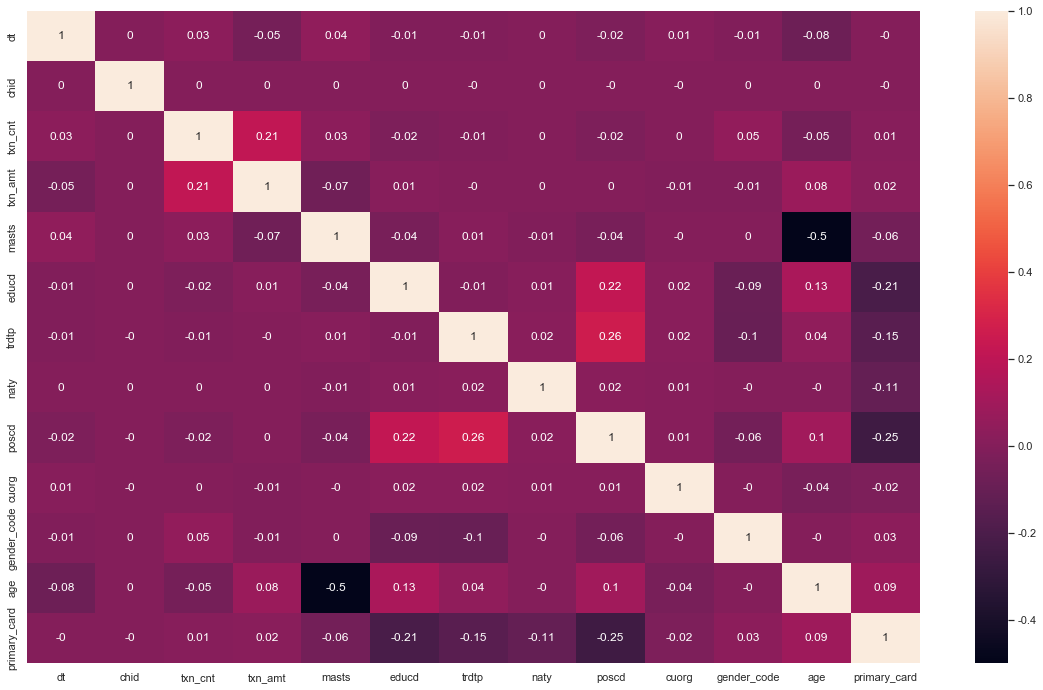

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20 ,12))
correlation_matrix = small.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True, ax=ax)